In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# - 한셀안의 인쇄동작을 모두 수행
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## [기상자료 데이터셋 ]
1. 기상자료 데이터셋 'suwon_weather.csv'파일을 이용하여 다음 주어진 문제를 처리한다
    - 데이터는 2000-01-01 ~ 2021-12-31기간까지 수원지역의 기상자료이다
2. 기상자료 데이터셋 참고 사이트는 다음과 같다
    - 기상자료개방포털 사이트 : https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70 
    - 메뉴 선택 : 기후통계분석 / 기온분석 메뉴를 선택
    - 검색조건 : 2000-01-01 ~ 2021-12-31기간까지 수원지역을 검색
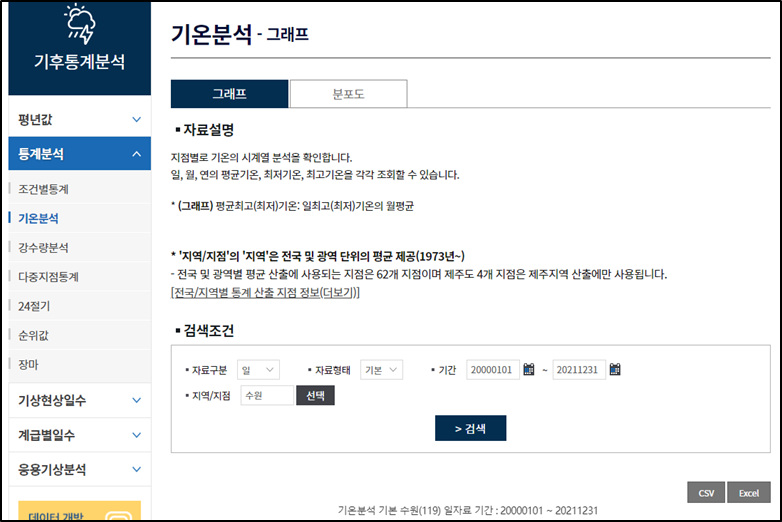

### [1] 'suwon_weather.csv' 파일 내용 확인하기
1. CSV 파일을 엑셀로 열어서 데이터의 내용을 살펴보자(아래 그림 참조)
    - 컬럼 제목의 위치는 어디인가?
    - 한글은 포맷이 무엇인가? (메모장에서 확인) => ANSI
    - 컬럼명은 Python에서 표현 가능한 문자들로 구성되어 있는가?
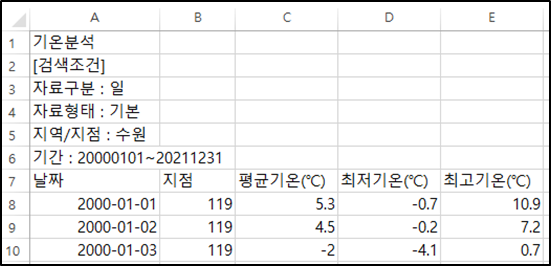
<br>      
2. CSV 파일을 읽어서 df 변수에 대입하라
- 단, 컬럼명은 ['날짜', '지점', '평균','최저','최고']로 수정한다(col변수 이용)

3. 읽어온 df의 정보를 확인하라. info() 메서드를 이용한다(다음 그림 참고)
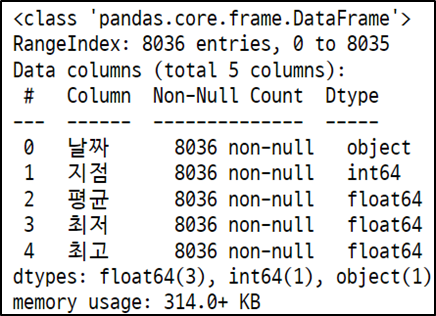  


4. 생성한 df의 처음 5개 행을 인쇄하라.(다음 그림 참고)
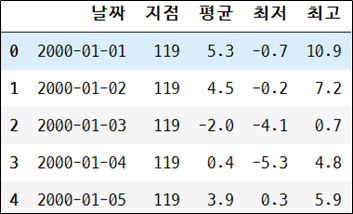

In [2]:
col = ['날짜', '지점', '평균','최저','최고'] # 컬럼명
file = 'suwon_weather.csv' #파일명

# [1-2] 코드 작성
# df = pd.read_csv(file, encoding='ANSI', skiprows=7, names=col)
df = pd.read_csv(file, encoding='ANSI', header=6, names=col)

# [1-3] 코드 작성
df.info()

# [1-4] 코드 작성
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      8036 non-null   object 
 1   지점      8036 non-null   int64  
 2   평균      8036 non-null   float64
 3   최저      8036 non-null   float64
 4   최고      8036 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 314.0+ KB


,날짜,지점,평균,최저,최고
0,2000-01-01,119,5.3,-0.7,10.9
1,2000-01-02,119,4.5,-0.2,7.2
2,2000-01-03,119,-2.0,-4.1,0.7
3,2000-01-04,119,0.4,-5.3,4.8
4,2000-01-05,119,3.9,0.3,5.9


### [2] df의 '날짜' 컬럼을 object 타입에서 datetime64 타입으로 변환하라
1. 날짜컬럼을 datetime64타입으로 변환하여 df원본을 갱신하는 다음 코드를 완성하라
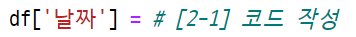


2. df의 컬럼별 타입을 확인하라. df.dtypes속성을 이용한다(다음 그림 참고)
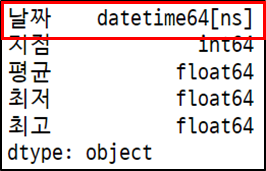

In [3]:
df['날짜'] = df['날짜'].astype('datetime64')# [2-1] 코드 작성
# [2-2] 코드 작성
df.dtypes

날짜    datetime64[ns]
지점             int64
평균           float64
최저           float64
최고           float64
dtype: object

### [3] 가장 더운날과 가장 추운날의 상위 3일치 정보 확인하기
1. df에서 가장 기온이 높았던 상위 3일의 행 데이터를 추출하라
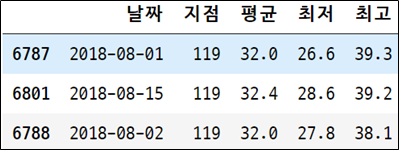
2. df에서 가장 기온이 낮았던 상위 3일의 행 데이터를 추출하라
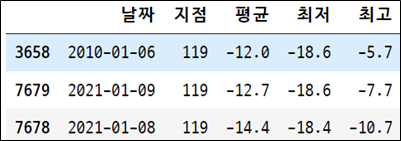

In [4]:
# [3-1] 코드 작성
df.nlargest(3,'최고')


# [3-2] 코드 작성
df.nsmallest(3,'최저')

,날짜,지점,평균,최저,최고
6787,2018-08-01,119,32.0,26.6,39.3
6801,2018-08-15,119,32.4,28.6,39.2
6788,2018-08-02,119,32.0,27.8,38.1


,날짜,지점,평균,최저,최고
3658,2010-01-06,119,-12.0,-18.6,-5.7
7679,2021-01-09,119,-12.7,-18.6,-7.7
7678,2021-01-08,119,-14.4,-18.4,-10.7


### [4] '날짜'컬럼을 index화하여 파일읽기
1. 'suwon_weather.csv'파일에서 '날짜'컬럼을 행의 index로 지정하여 read_csv()로 다시 읽어와 df2변수에 대입한다
2. 컬럼명을 주어진 col변수의 컬럼목록을 이용하여 변경한다  
3. df2의 결과는 다음 그림과 같이 생성되어야 한다(df2 일부만 인쇄)
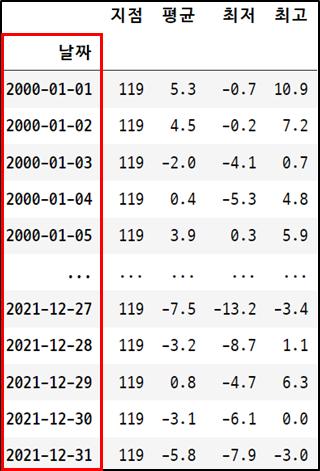

In [5]:
col = ['날짜', '지점', '평균','최저','최고']
file = 'suwon_weather.csv'
df2 = pd.read_csv(file,encoding='ANSI', header=6, names=col, index_col='날짜')

# [4] 코드 작성
df2


,지점,평균,최저,최고
날짜,,,,
2000-01-01,119,5.3,-0.7,10.9
2000-01-02,119,4.5,-0.2,7.2
2000-01-03,119,-2.0,-4.1,0.7
2000-01-04,119,0.4,-5.3,4.8
2000-01-05,119,3.9,0.3,5.9
...,...,...,...,...
2021-12-27,119,-7.5,-13.2,-3.4
2021-12-28,119,-3.2,-8.7,1.1
2021-12-29,119,0.8,-4.7,6.3


### [5] df2를 이용하여 다음 조건에 따라 처리하라
1. df2에서 가장 추운날 상위 10개 데이터를 추출하여 df3변수에 대입하라(다음 그림 참고)
- 단 최저기온이 동일한 경우 최고기온이 더 낮은 순서로 배치한다
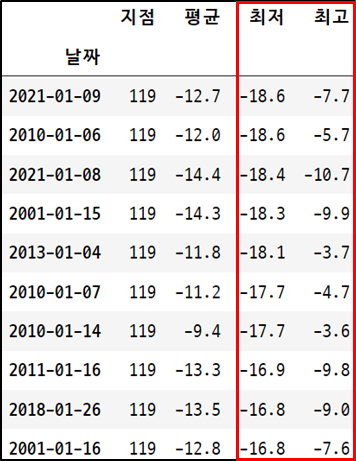

2. 완성한 df3에서 날짜만 인쇄하라.
- index.values 속성을 이용한다. print()로 인쇄한 결과는 다음과 같다  
['2021-01-09' '2010-01-06' '2021-01-08' '2001-01-15' '2013-01-04'  
 '2010-01-07' '2010-01-14' '2011-01-16' '2018-01-26' '2001-01-16']
3. 완성한 df3에서 최저기온 values만 인쇄하라
- values 속성을 이용한다. print()로 인쇄한 결과는 다음과 같다  
[-18.6 -18.6 -18.4 -18.3 -18.1 -17.7 -17.7 -16.9 -16.8 -16.8]

In [6]:
# [5-1] 코드 작성
df3 = df2.nsmallest(10, ['최저','최고'])
df3

,지점,평균,최저,최고
날짜,,,,
2021-01-09,119,-12.7,-18.6,-7.7
2010-01-06,119,-12.0,-18.6,-5.7
2021-01-08,119,-14.4,-18.4,-10.7
2001-01-15,119,-14.3,-18.3,-9.9
2013-01-04,119,-11.8,-18.1,-3.7
2010-01-07,119,-11.2,-17.7,-4.7
2010-01-14,119,-9.4,-17.7,-3.6
2011-01-16,119,-13.3,-16.9,-9.8
2018-01-26,119,-13.5,-16.8,-9.0


In [7]:
# [5-2] 코드 작성
print(df3.index.values)

['2021-01-09' '2010-01-06' '2021-01-08' '2001-01-15' '2013-01-04'
 '2010-01-07' '2010-01-14' '2011-01-16' '2018-01-26' '2001-01-16']


In [8]:
# [5-3] 코드 작성
print(df3['최저'].values)

[-18.6 -18.6 -18.4 -18.3 -18.1 -17.7 -17.7 -16.9 -16.8 -16.8]
